
</p></center>


1.   List item
2.   List item


<h1><center><font size=8>Data Science</center></font></h1>
<h1><center>Project 1: Health Insurance Data Analysis</center></h1>

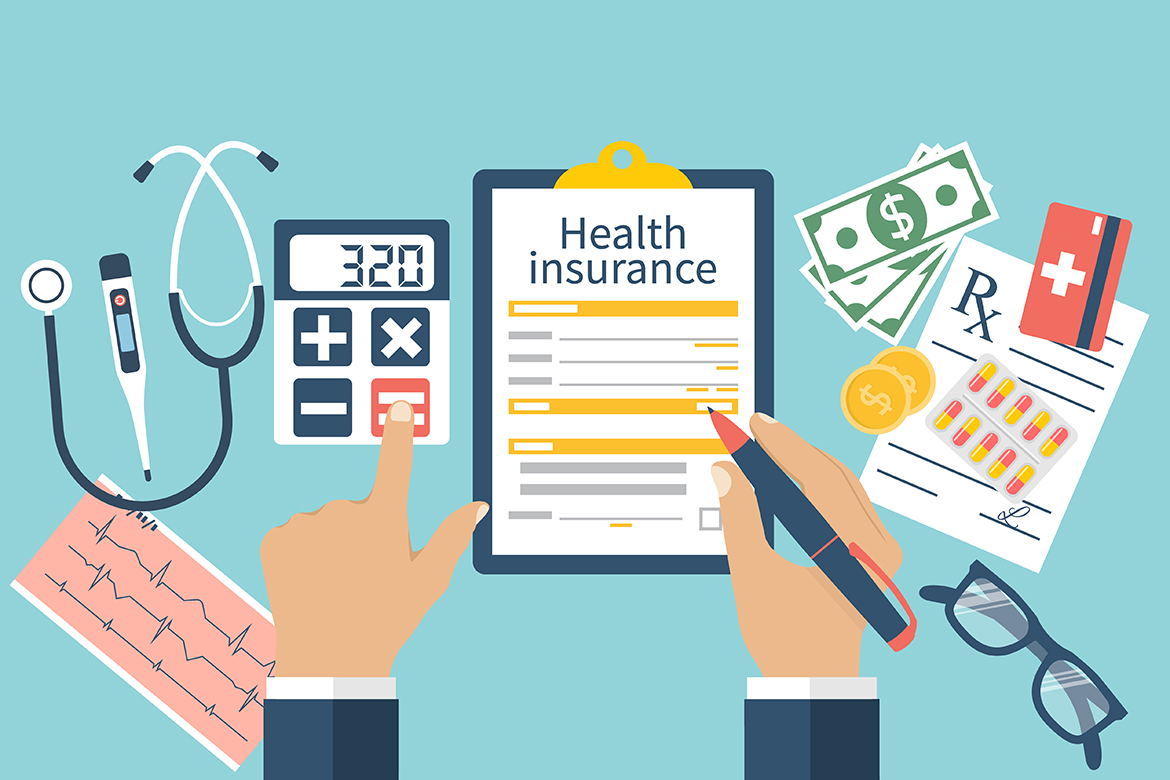




<b><h2><center>Insurance Project</center></h2></b>

# Background
In 2022, concern was raised over the rapid increase in insurance premiums, an integral component of US healthcare insurance. For many years, several polls has found that the high cost of health care is a burden on U.S. families, and that health care costs factor into decisions about insurance coverage and care seeking. These costs also rank as a top financial worry. This data note summarizes recent polls on the public’s experiences with health care costs.
Main takeaways include:

**About half of U.S. adults say they have difficulty affording health care costs.** About four in ten U.S. adults say they have delayed or gone without medical care in the last year due to cost, with dental services being the most common type of care adults report putting off due to cost.

**Substantial shares of adults 65 or older report difficulty paying for various aspects of health care,** especially services not generally covered by Medicare, such as hearing services, dental and prescription drug costs.

**The cost of health care often prevents people from getting needed care or filling prescriptions**. About a quarter of adults say they or family member in their household have not filled a prescription, cut pills in half, or skipped doses of medicine in the last year because of the cost, with larger shares of those in households with lower incomes, Black and Hispanic adults, and women reporting this.

**High health care costs disproportionately affect uninsured adults, Black and Hispanic adults, and those with lower incomes.**

Larger shares of U.S. adults in each of these groups report difficulty affording various types of care and delaying or forgoing medical care due to the cost.

**Those who are covered by health insurance are not immune to the burden of health care costs.**

About one-third of insured adults worry about affording their monthly health insurance premium, and 44% worry about affording their deductible before health insurance kicks in.

**Health care debt is a burden for a large share of Americans.** About four in ten adults (41%) report having debt due to medical or dental bills including debts owed to credit cards, collections agencies, family and friends, banks, and other lenders to pay for their health care costs, with disproportionate shares of Black and Hispanic adults, women, parents, those with low incomes, and uninsured adults saying they have health care debt.

**Affording gasoline and transportation costs is now a top worry for Americans followed by unexpected medical bills.** While worry over gasoline and transportation costs has risen markedly since 2020, significant shares of adults still say they are worried about affording medical costs such as unexpected bills, deductibles, and long-term care services for themselves or a family member.

# Objective:
To visualize various variables influencing insurance charges in US.

**Basic Questions:**
* how do you identify variables that are normally distributed? which one of the variables in insurance dataset is/are normally distributed?
* how any females and males are present in this dataset?
* What are the mean and median ages of enrollees in this case study?
* What is the median number of children in this case study?
* is there a difference between bmi mean and median?

**Key business questions to be answered and visualized:**

* Can you identify variables that are highly correlated ?
* What region incurred the highest (& least) insurance charges?
* Do smokers incur more charges?
* is there a statistical difference between average charges incurred by smoker and non-smokers
look into shapiro test https://www.statology.org/shapiro-wilk-test-python/, t-test https://www.statology.org/pandas-t-test/ and Mann whitney test https://www.statology.org/mann-whitney-u-test-python/
* is there a statistical difference between age of various enrollee insurance plan ?
look into : https://www.statology.org/kruskal-wallis-test-python/ & https://www.statology.org/one-way-anova-python/



# Dataset:

* **enrolleeID**: unique identifier of enrollees
* **age**: age of enrollees
* **gender**: gender of enrollee (M or F)
* **bmi**: body mass index of enrollees
* **children**: Number of children by enrollees
* **smoker**: Is the enrollee a smoker (yes or no)
* **region**: geographical location of enrollees
* **charges**: charges in US$ .
* **plan**: insurance plan (bronze, silver, gold, platinum)


In [ ]:
#import pandas package

import pandas as pd # data  loading, manipulation and wrangling
pd.set_option('display.max_rows', None) # display all rows in the dataset
pd.set_option('display.max_columns', None) # display all columns in the dataset
pd.set_option('display.float_format', lambda x: '%.2f' % x) # suppress all scientific notations and round to 2 decimal places

#Visualization
import plotly.express as px #interactive visualization
import seaborn as sns # statistical visualization
import matplotlib.pyplot as plt # basic visualization
# Command to tell Python to actually display the graphs
%matplotlib inline


In [ ]:
#connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the dataset into Pandas
insurancedata_new = pd.read_csv('/content/drive/MyDrive/wale/visualization/insurance_new.csv')


In [ ]:
#Make a copy of the data
df = insurancedata_new.copy()

In [ ]:
#list the columns present in the dataset
#print (df.columns)
print (list(df.columns))


['enrolleeID', 'gender', 'age', 'bmi', 'children', 'smoker', 'plan', 'region', 'charges']


## Data Quality Check

In [ ]:
#Get the top 10 rows of the dataset
#print(df.sample(10))
df.head(10)


,enrolleeID,gender,age,bmi,children,smoker,plan,region,charges
0,8949,female,19,27.90,0,yes,platinum,southwest,16884.92
1,29725,male,18,33.77,1,no,bronze,southeast,1725.55
2,11561,male,28,33.00,3,no,bronze,southeast,4449.46
3,33241,male,33,22.70,0,no,gold,northwest,21984.47
4,666,male,32,28.88,0,no,gold,northwest,3866.86
5,21651,female,31,25.74,0,no,bronze,southeast,3756.62
6,28806,female,46,33.44,1,no,bronze,southeast,8240.59
7,402,female,37,27.74,3,no,gold,northwest,7281.51
8,27107,male,37,29.83,2,no,silver,northeast,6406.41
9,699,female,60,25.84,0,no,gold,northwest,28923.14


In [ ]:
#Get the last 10 rows of the dataset
print(df.tail(10))

      enrolleeID  gender  age   bmi  children smoker      plan     region  \
1328       24671  female   23 24.23         2     no    silver  northeast   
1329       17679    male   52 38.60         2     no  platinum  southwest   
1330       21192  female   57 25.74         2     no    bronze  southeast   
1331        4029  female   23 33.40         0     no  platinum  southwest   
1332       28907  female   52 44.70         3     no  platinum  southwest   
1333        7826    male   50 30.97         3     no      gold  northwest   
1334       20728  female   18 31.92         0     no    silver  northeast   
1335       15217  female   18 36.85         0     no    bronze  southeast   
1336       19737  female   21 25.80         0     no  platinum  southwest   
1337       10333  female   61 29.07         0    yes      gold  northwest   

      charges  
1328 22395.74  
1329 10325.21  
1330 12629.17  
1331 10795.94  
1332 11411.68  
1333 10600.55  
1334  2205.98  
1335  1629.83  
1336  20

In [ ]:
#Get the information/datatype of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   enrolleeID  1338 non-null   int64  
 1   gender      1338 non-null   object 
 2   age         1338 non-null   int64  
 3   bmi         1338 non-null   float64
 4   children    1338 non-null   int64  
 5   smoker      1338 non-null   object 
 6   plan        1338 non-null   object 
 7   region      1338 non-null   object 
 8   charges     1338 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 94.2+ KB


**Observations -**
* There are no null values in the dataset.
* We can convert the object type columns to categories.

`converting "objects" to "category" reduces the data space required to store the dataframe`

#### Fix the data types

In [ ]:
cols = df.select_dtypes(['object'])
cols.columns

Index(['gender', 'smoker', 'plan', 'region'], dtype='object')

In [ ]:
for i in cols.columns:
  df[i] = df[i].astype('category')

# check if the 'object' has been converted to 'category' data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   enrolleeID  1338 non-null   int64   
 1   gender      1338 non-null   category
 2   age         1338 non-null   int64   
 3   bmi         1338 non-null   float64 
 4   children    1338 non-null   int64   
 5   smoker      1338 non-null   category
 6   plan        1338 non-null   category
 7   region      1338 non-null   category
 8   charges     1338 non-null   float64 
dtypes: category(4), float64(2), int64(3)
memory usage: 58.3 KB


In [ ]:
#Shape of data - Total number of rows, columns
df.shape

(1338, 9)

In [ ]:
#identify columns with missing values
df.isna().sum()

enrolleeID    0
gender        0
age           0
bmi           0
children      0
smoker        0
plan          0
region        0
charges       0
dtype: int64

## Summary Statistics

In [ ]:
#Description of the dataset for Continuous variables
df.describe().T
#When mean = median that means the data is normal distribution.

,count,mean,std,min,25%,50%,75%,max
enrolleeID,1338.00,17330.04,9670.51,18.00,9166.50,17372.50,25829.75,33367.00
age,1338.00,39.21,14.05,18.00,27.00,39.00,51.00,64.00
bmi,1338.00,30.66,6.10,15.96,26.30,30.40,34.69,53.13
children,1338.00,1.09,1.21,0.00,0.00,1.00,2.00,5.00
charges,1338.00,13270.42,12110.01,1121.87,4740.29,9382.03,16639.91,63770.43


In [ ]:
##Description of the dataset for Categorical variables
df.describe(include= 'object').T

,count,unique,top,freq
gender,1338,2,male,676
smoker,1338,2,no,1064
plan,1338,4,bronze,364
region,1338,5,southeast,358


#### Exploratory Data Analysis

- Modular function for visualization of continuous variable and categorical variable distributions
- historgram + boxplot (univariate continuous )
- barplot (univariate categorical variable)
- stackbarplot (bivariate variables)


In [ ]:
def histogram_box(data, feature, figsize=(6, 6), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (desired(6,6))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="blue"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="red", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="green", linestyle="-"
    )  # Add median to the histogram


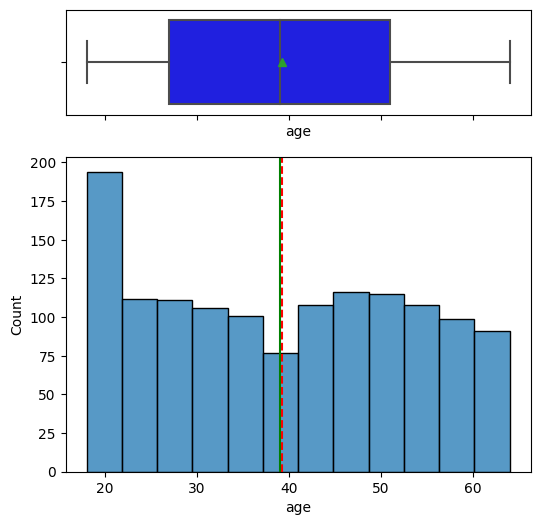

In [ ]:
histogram_box(df,'age' )

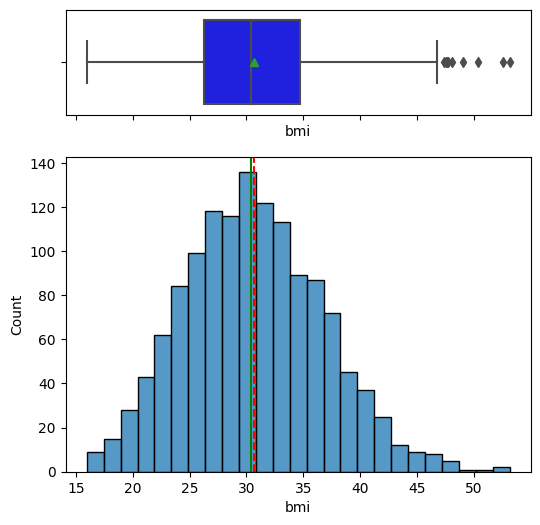

In [ ]:
histogram_box(df,'bmi')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   enrolleeID  1338 non-null   int64   
 1   gender      1338 non-null   category
 2   age         1338 non-null   int64   
 3   bmi         1338 non-null   float64 
 4   children    1338 non-null   int64   
 5   smoker      1338 non-null   category
 6   plan        1338 non-null   category
 7   region      1338 non-null   category
 8   charges     1338 non-null   float64 
dtypes: category(4), float64(2), int64(3)
memory usage: 58.3 KB


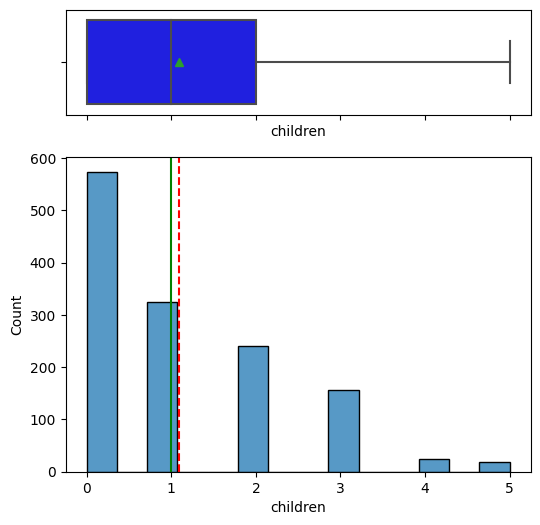

In [ ]:
histogram_box(df, "children")

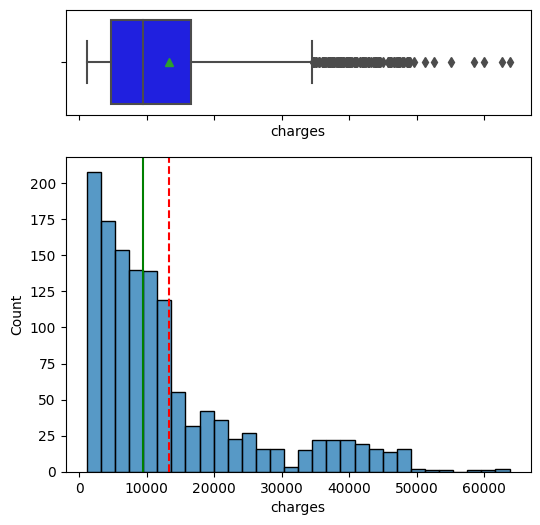

In [ ]:
histogram_box(df, "charges")

##### Categorical Variables


In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=45, fontsize=12)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=9,
            xytext=(0, 3),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

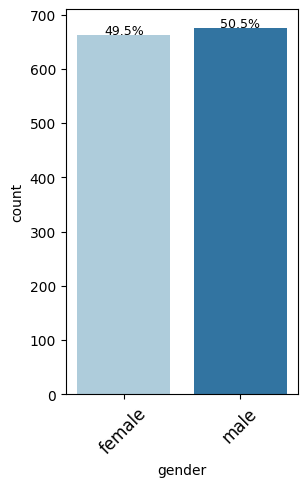

In [ ]:
labeled_barplot(df,"gender")

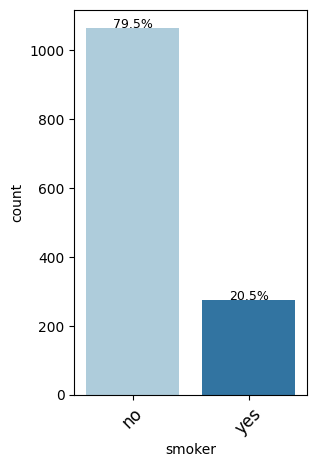

In [ ]:
labeled_barplot(df,"smoker")

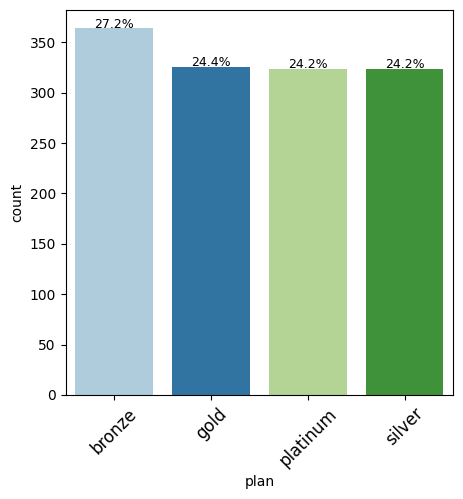

In [ ]:
labeled_barplot(df,"plan")

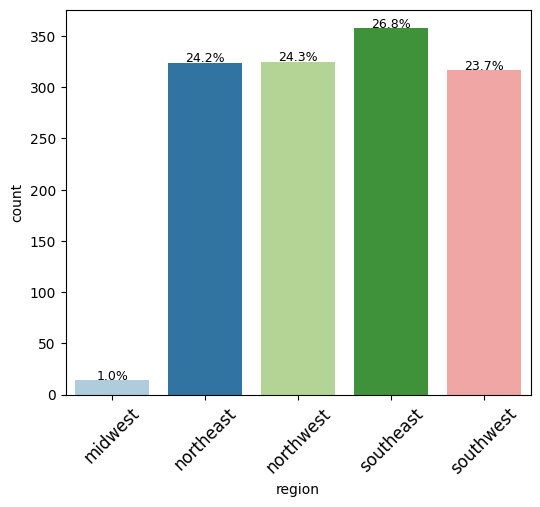

In [ ]:
labeled_barplot(df,"region")

#### Bivariate
- Stacked barplot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

smoker    no  yes   All
age                    
All     1064  274  1338
19        50   18    68
43        15   12    27
18        57   12    69
47        19   10    29
27        19    9    28
30        18    9    27
20        20    9    29
37        16    9    25
42        19    8    27
64        15    7    22
23        21    7    28
36        19    6    25
61        17    6    23
52        23    6    29
51        23    6    29
39        19    6    25
22        22    6    28
44        21    6    27
29        21    6    27
24        22    6    28
33        20    6    26
63        18    5    23
25        23    5    28
60        18    5    23
54        23    5    28
53        23    5    28
34        21    5    26
48        24    5    29
35        20    5    25
46        24    5    29
40        22    5    27
45        24    5    29
31        22    5    27
32        21    5    26
49        24    4    28
62        19    4    23
59        21    4    25
57        22    4    26
56        22    

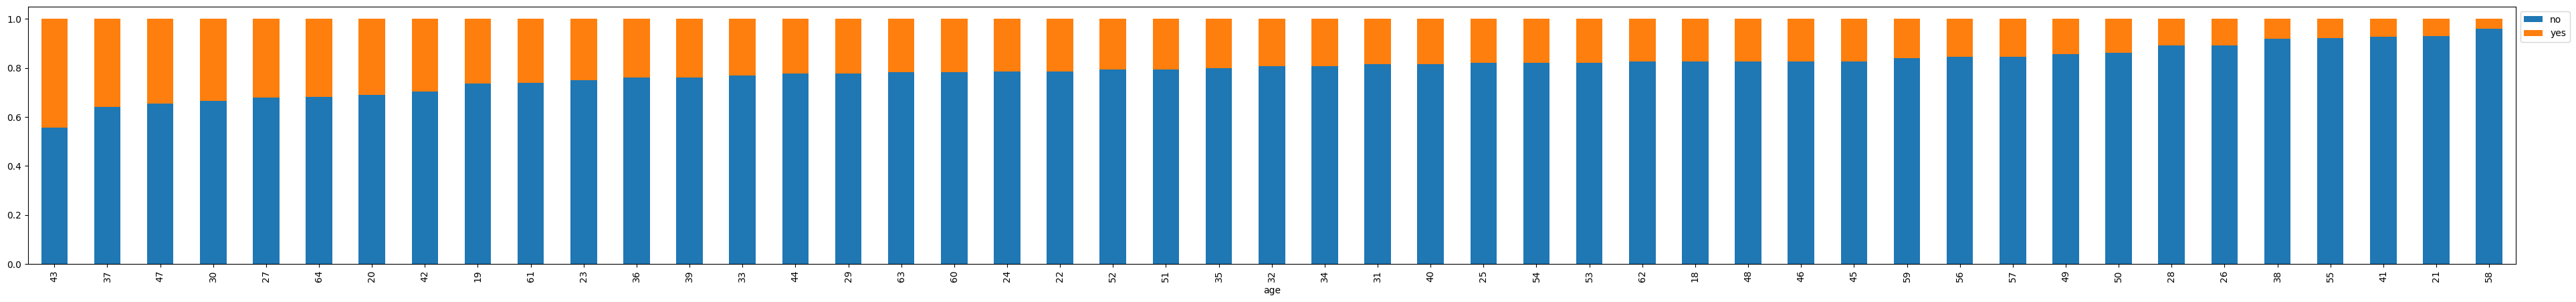

In [ ]:
stacked_barplot(df, "age","smoker")


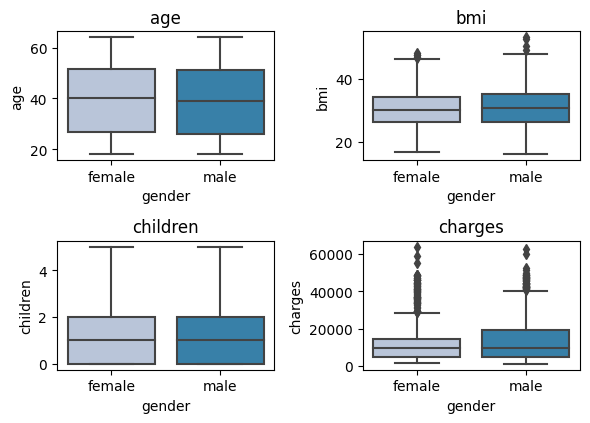

In [ ]:
 col = df[["age",'bmi','children','charges']]
 plt.figure(figsize = (6,6))

 for i, variable in enumerate(col):

  plt.subplot(3,2,i+1)
  sns.boxplot(x=df['gender'],y =df[ variable], palette='PuBu')
  plt.tight_layout()
  plt.title(variable)

plt.show()


In [ ]:
correlation = df.corr()
correlation

<ipython-input-23-b6c2249924d6>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,enrolleeID,age,bmi,children,charges
enrolleeID,1.00,0.06,0.01,-0.00,0.05
age,0.06,1.00,0.11,0.04,0.30
bmi,0.01,0.11,1.00,0.01,0.20
children,-0.00,0.04,0.01,1.00,0.07
charges,0.05,0.30,0.20,0.07,1.00


In [ ]:
#Define your hypothesis
#Null Hypothesis , data is normal distributions
#If it less than 0.05 not normal dstribution, greater it is normally distributed(symetrical)

In [ ]:
#how do you identify variables that are normally distributed? which one of the variables in insurance dataset is/are normally distributed? None

from scipy.stats import shapiro
stat,p_value = shapiro(df['charges'])
print(p_value)
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
  print('the charges variable is not normally distributed')
else:
  print('the charges variable is normally distributed')




1.1505194006561963e-36
the charges variable is not normally distributed


In [ ]:
#how do you identify variables that are normally distributed? which one of the variables in insurance dataset is/are normally distributed? None

from scipy.stats import shapiro
stat,p_value = shapiro(df['bmi'])
print(p_value)
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
  print('the charges variable is not normally distributed')
else:
  print('the charges variable is normally distributed')

2.6033414542325772e-05
the charges variable is not normally distributed


In [ ]:
#how do you identify variables that are normally distributed? which one of the variables in insurance dataset is/are normally distributed? None

from scipy.stats import shapiro
stat,p_value = shapiro(df['age'])
print(p_value)
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
  print('the charges variable is not normally distributed')
else:
  print('the charges variable is normally distributed')

5.687060076887153e-22
the charges variable is not normally distributed


In [ ]:
#how do you identify variables that are normally distributed? which one of the variables in insurance dataset is/are normally distributed? None

from scipy.stats import shapiro
stat,p_value = shapiro(df['children'])
print(p_value)
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
  print('the charges variable is not normally distributed')
else:
  print('the charges variable is normally distributed')

5.06690727121734e-36
the charges variable is not normally distributed


In [ ]:
#Get the unique values of Gender
df.gender.unique()

array(['female', 'male'], dtype=object)

In [ ]:
#how any females and males are present in this dataset?
df['gender'].value_counts(normalize= False)

male      676
female    662
Name: gender, dtype: int64

In [ ]:
#What are the mean and median ages of enrollees in this case study?
#print(df.describe().T)
print (df.age.describe().T)


count   1338.00
mean      39.21
std       14.05
min       18.00
25%       27.00
50%       39.00
75%       51.00
max       64.00
Name: age, dtype: float64


<Axes: >

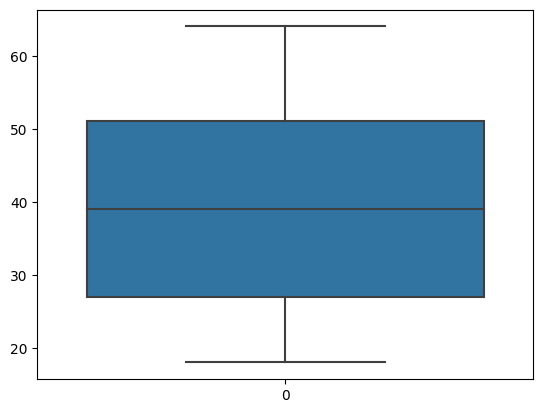

In [ ]:
sns.boxplot(df['age'])

sns.histplot()

<Axes: xlabel='age', ylabel='Count'>

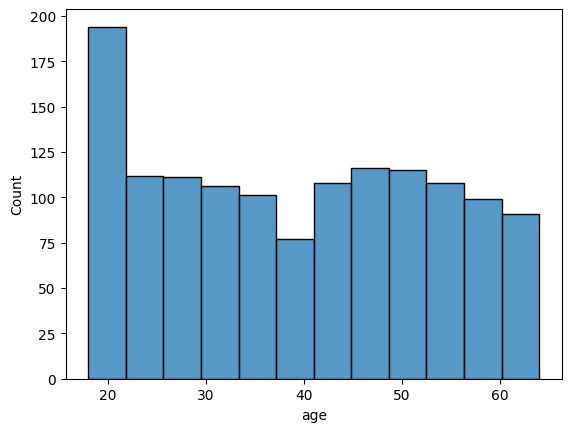

In [ ]:
#px.histogram(df, x = "age")


sns.histplot(df['age'])

In [ ]:
#What is the median number of children in this case study? --1.oo

print (df.children.describe().T)

count   1338.00
mean       1.09
std        1.21
min        0.00
25%        0.00
50%        1.00
75%        2.00
max        5.00
Name: children, dtype: float64


In [ ]:
#is there a difference between bmi mean and median? Yes Mean is 30.66 and median 30.40
print (df.bmi.describe().T)

count   1338.00
mean      30.66
std        6.10
min       15.96
25%       26.30
50%       30.40
75%       34.69
max       53.13
Name: bmi, dtype: float64


In [ ]:
#df.drop(['enrolleeID'],axis = 1, inplace = True)
correlation = df.corr()
correlation

<ipython-input-13-f86b1c647daa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,enrolleeID,age,bmi,children,charges
enrolleeID,1.00,0.06,0.01,-0.00,0.05
age,0.06,1.00,0.11,0.04,0.30
bmi,0.01,0.11,1.00,0.01,0.20
children,-0.00,0.04,0.01,1.00,0.07
charges,0.05,0.30,0.20,0.07,1.00


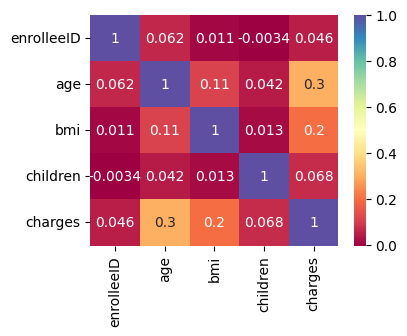

In [ ]:
#Can you identify variables that are highly correlated ? Charges is highly correlated to bmi and age.  Age and BMI are also correlated
plt.figure(figsize=(4, 3))
sns.heatmap(correlation,annot=True,cmap="Spectral");

#-1  Negative correlation
# 0 : Orthogonal
#1 : Positive correlation

<ipython-input-38-e59307d27ba7>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



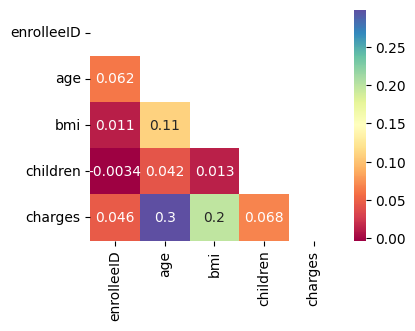

In [ ]:
plt.figure(figsize=(4, 3))
# creating mask
mask = np.triu(np.ones_like(df.corr()))

sns.heatmap(correlation,annot=True,cmap="Spectral",mask = mask
            );

Charges is highly correlated to bmi and age
Age and BMI are also correlated

In [ ]:
#What region incurred the highest (& least) insurance charges? Southeast and Midwest respectively

print(df['region'].unique())
highest_charges = df.groupby('region').sum()[['charges']].sort_values('charges',ascending = False).reset_index().head(10)
highest_charges

# visualize the sum charges per region  - catplot vs countplot ???



['southwest' 'southeast' 'northwest' 'northeast' 'midwest']


<ipython-input-33-22d0c61c5c39>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  highest_charges = df.groupby('region').sum()[['charges']].sort_values('charges',ascending = False).reset_index().head(10)


,region,charges
0,southeast,5226914.14
1,northeast,4343668.58
2,northwest,4035712.00
3,southwest,3874333.48
4,midwest,275196.79


<Figure size 300x200 with 0 Axes>

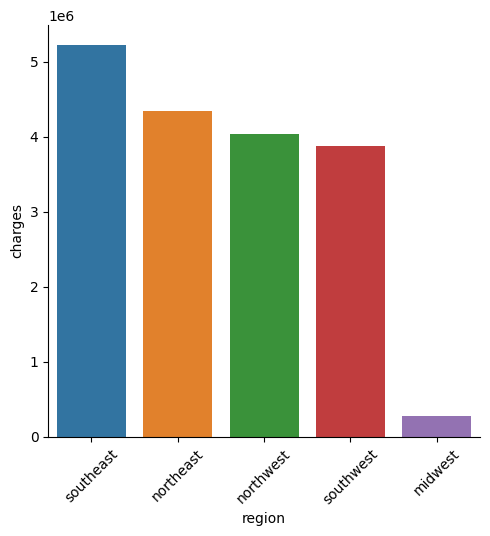

In [ ]:
plt.figure(figsize=(3,2))
sns.catplot(data=highest_charges,x='region', y='charges', kind='bar')
plt.xticks(rotation=45);

In [ ]:
#sns.catplot(x ='charges', hue = "region", data = df)

Midwest incurred the lowest while southwest incurred the highest

<Figure size 300x200 with 0 Axes>

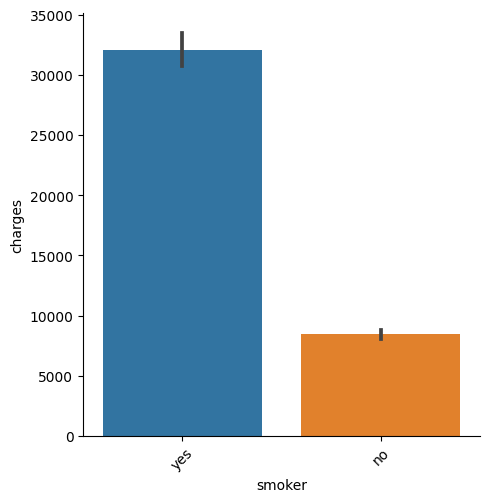

In [ ]:
#Do smokers incur more charges? Yes
plt.figure(figsize=(3,2))
sns.catplot(data=df,x= 'smoker', y='charges', kind='bar')
plt.xticks(rotation=45);


In [ ]:
#is there a statistical difference between average charges incurred by smoker and non-smokers look into shapiro test https://www.statology.org/shapiro-wilk-test-python/, t-test https://www.statology.org/pandas-t-test/ and Mann whitney test https://www.statology.org/mann-whitney-u-test-python/
#is there a statistical difference between age of various enrollee insurance plan ? look into : https://www.statology.org/kruskal-wallis-test-python/ & https://www.statology.org/one-way-anova-python/

import scipy.stats as stats
from scipy.stats import ttest_ind

#perform the Mann-Whitney U test
#stats.mannwhitneyu(df.charges, df.smoker, alternative='two-sided')


Define the hypothesis

Null hypothesis: there is no statistical difference between the charges incurred by smokers and non-smokers
- Ho : charges incurred by smokers `==`charges incurred by non-smokers

Alternative hypothesis:  there is statistical difference between the charges incurred by smokers and non-smokers

- H1:  charges incurred by smokers `!=` charges incurred by non-smokers

Alpha: level significance  
- 0.05

Experiment
-  Mann whitney test

Compare p-value from your experiment with your alpha

p-value < alpha or p-value  > alpha

Conclusion

if p_value < alpha:

    print('Reject Null hypothesis')
else:

    print('Do not Reject Null Hypothesis')




In [ ]:
df.head(3)
df1 = df[['smoker','gea','bmi','children','charges']]

In [ ]:
cols = df1.columns.difference(['smoker'])
# or with an explicit list
# cols = ['age','bmi','children','charges']

group1 = df1[df1['smoker']=='yes']
group2 = df1[df1['smoker']=='no']
out = pd.DataFrame(stats.mannwhitneyu(group1[cols], group2[cols]),
                   columns=cols, index=['statistic', 'pvalue'])

out

,age,bmi,charges,children
statistic,140512.00,146227.50,284133.00,149048.00
pvalue,0.36,0.94,0.00,0.54


is there a statistical difference between age of various enrollee insurance plan

Define the htpothesis

Null hypothesis: there is no statistical difference between the age of various insurance plans
- Ho : age_of_gold `==`age_of_silver `==` age_of_bronze `==` age_of_platinum


Alternative hypothesis:  there is statistical difference between the charges incurred by smokers and non-smokers

- H1:  age_of_gold `==`age_of_silver `!=` age_of_bronze `==` age_of_platinum

Alpha: level significance  
- 0.05

Experiment
-  kruskall wallis test  

Compare p-value from your experiment with your alpha

p-value < alpha or p-value  > alpha

Conclusion

if p_value < alpha:

    print('Reject Null hypothesis')
else:

    print('Do not Reject Null Hypothesis')

In [ ]:
df_plan = df[['plan','age','bmi','children','charges']]
df_plan.head(3)

,plan,age,bmi,children,charges
0,platinum,19,27.90,0,16884.92
1,bronze,18,33.77,1,1725.55
2,bronze,28,33.00,3,4449.46


In [ ]:
from itertools import combinations
df_plan = df[['plan','age','bmi','children','charges']]
cols = df_plan.columns.difference(['plan'])

g = df_plan.groupby('plan')[cols]

out = pd.concat({(a,b): pd.DataFrame(ttest_ind(g.get_group(a), g.get_group(b)),
                                     columns=cols, index=['statistic', 'pvalue'])
                 for a, b in combinations(df_plan['plan'].unique(), 2)
                }, names=['plan1', 'plan2'])

out

age   bmi  charges  children
plan1    plan2                                          
platinum bronze statistic  0.56 -5.88    -2.41      1.02
                pvalue     0.58  0.00     0.02      0.31
         gold   statistic  0.33  3.20    -0.24      0.01
                pvalue     0.74  0.00     0.81      0.99
         silver statistic  0.19  3.02    -1.38      1.02
                pvalue     0.85  0.00     0.17      0.31
bronze   gold   statistic -0.22  9.16     2.22     -1.06
                pvalue     0.83  0.00     0.03      0.29
         silver statistic -0.36  8.68     1.15      0.03
                pvalue     0.72  0.00     0.25      0.97
gold     silver statistic -0.14  0.05    -1.16      1.05
                pvalue     0.89  0.96     0.24      0.29